In [2]:
import pandas as pd
import emoji

In [3]:
df=pd.read_csv("CSDS351_Project_Data.csv", encoding= 'unicode_escape')
data=pd.concat([df['text'],df['sentiment']],axis=1)
data

,text,sentiment
0,Animals defecating fornicating and playing are...,Positive
1,âI regret nothing! Do hear me? Nothing!â,Positive
2,It just wanted to be a part of them,Negative
3,feed me or i press enter,Negative
4,They call him Gordie.,Neutral
...,...,...
620,Are groups like ASMP PPA etc. relevant anymore?,Neutral
621,What are your thoughts on the artistic ethics ...,Neutral
622,Album Share Tuesday: April 04 2023,Neutral
623,Official Question Thread! Ask /r/photography a...,Neutral


In [4]:
new_data=pd.read_csv('test_data2.csv', encoding= 'unicode_escape')
data= data.append(new_data, ignore_index=True)
data

,text,sentiment
0,Animals defecating fornicating and playing are...,Positive
1,âI regret nothing! Do hear me? Nothing!â,Positive
2,It just wanted to be a part of them,Negative
3,feed me or i press enter,Negative
4,They call him Gordie.,Neutral
...,...,...
1869,[homemade] Detroit Style Pizza,Neutral
1870,[Homemade] Avocado toast with spicy honey bake...,Neutral
1871,[homemade] twice smoked spiral ham with a glaze,Neutral
1872,[homemade] night before Easter grazing board,Neutral


In [5]:
data = data.apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
data = data.apply(lambda x: x.apply(lambda y: emoji.demojize(y)))

In [6]:
data

,text,sentiment
0,Animals defecating fornicating and playing are...,Positive
1,I regret nothing! Do hear me? Nothing!,Positive
2,It just wanted to be a part of them,Negative
3,feed me or i press enter,Negative
4,They call him Gordie.,Neutral
...,...,...
1869,[homemade] Detroit Style Pizza,Neutral
1870,[Homemade] Avocado toast with spicy honey bake...,Neutral
1871,[homemade] twice smoked spiral ham with a glaze,Neutral
1872,[homemade] night before Easter grazing board,Neutral


In [7]:
from transformers import pipeline

c:\Users\vshar\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
def label_to_pred(label: str):
    """Label should be one of LABEL_0, LABEL_1 or LABEL_2
    """
    idx = label.split("_")[1]
    if not idx.isdigit():
        return f"Bad prediction label: {label}"

    label_idx = int(idx)
    mappings = ["Negative", "Neutral", "Positive"]
    return mappings[label_idx]

In [9]:
from transformers import pipeline, AutoTokenizer
from bs4 import BeautifulSoup
import contractions
import re
import unicodedata
import nltk
from nltk.tokenize import ToktokTokenizer
nltk.download('stopwords')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vshar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def expand_contractions(text):
    expanded_words = []   
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
    new_text = ' '.join(expanded_words)
    return new_text

def remove_special_characters(text):
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def remove_extra_whitespace_tabs(text):
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def to_lowercase(text):
    return text.lower()


In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 

def get_lem(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text, pos='n')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vshar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vshar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
data.head()

,text,sentiment
0,animals defecating fornicating and playing are...,Positive
1,i regret nothing! do hear me? nothing!,Positive
2,it just wanted to be a part of them,Negative
3,feed me or i press enter,Negative
4,they call him gordie.,Neutral


In [13]:
for i in range(1874):
    input=remove_html_tags(data['text'][i])
    input=remove_accented_chars(input)
    input=expand_contractions(input)
    input=remove_special_characters(input)
    input=get_lem(input)
    input=remove_extra_whitespace_tabs(input)
    input=to_lowercase(input)
    data['text'][i]=input

C:\Users\vshar\AppData\Local\Temp\ipykernel_22196\960295636.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [35]:
data

,text,sentiment
0,Animals defecating fornicating and playing are...,Positive
1,âI regret nothing! Do hear me? Nothing!â,Positive
2,It just wanted to be a part of them,Negative
3,feed me or i press enter,Negative
4,They call him Gordie.,Neutral
...,...,...
1869,[homemade] Detroit Style Pizza,Neutral
1870,[Homemade] Avocado toast with spicy honey bake...,Neutral
1871,[homemade] twice smoked spiral ham with a glaze,Neutral
1872,[homemade] night before Easter grazing board,Neutral


In [15]:
accuracy=0
count=0
predicted_labels=[]
classifier = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
for i in range(1874):
    res=classifier(data["text"][i])[0]
    label=label_to_pred(res["label"])
    predicted_labels.append(label)
    if (label==data["sentiment"][i]):
        count=count+1
accuracy=count/1874


In [16]:
accuracy_scores=[]
accuracy_scores.append(accuracy)

In [17]:
data['Model1']=predicted_labels
data.head()

,text,sentiment,Model1
0,animals defecating fornicating and playing are...,Positive,Negative
1,i regret nothing! do hear me? nothing!,Positive,Positive
2,it just wanted to be a part of them,Negative,Neutral
3,feed me or i press enter,Negative,Neutral
4,they call him gordie.,Neutral,Neutral


In [18]:
accuracy=0
count=0
predicted_labels=[]
classifier = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
for i in range(1874):
    res=classifier(data["text"][i])[0]
    label=res["label"]
    predicted_labels.append(label)
    if (label==to_lowercase(data["sentiment"][i])):
        count=count+1
accuracy=count/1874

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
accuracy_scores.append(accuracy)
data['Model2']=predicted_labels
data.head()

,text,sentiment,Model1,Model2
0,animals defecating fornicating and playing are...,Positive,Negative,negative
1,i regret nothing! do hear me? nothing!,Positive,Positive,positive
2,it just wanted to be a part of them,Negative,Neutral,neutral
3,feed me or i press enter,Negative,Neutral,neutral
4,they call him gordie.,Neutral,Neutral,neutral


In [20]:
accuracy=0
count=0
predicted_labels=[]
classifier = pipeline(model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
for i in range(1874):
    res=classifier(data["text"][i])[0]
    label=res["label"]
    predicted_labels.append(label)
    if (label==to_lowercase(data["sentiment"][i])):
        count=count+1
accuracy=count/1874

In [21]:
accuracy_scores.append(accuracy)
data['Model3']=predicted_labels
data.head()

,text,sentiment,Model1,Model2,Model3
0,animals defecating fornicating and playing are...,Positive,Negative,negative,neutral
1,i regret nothing! do hear me? nothing!,Positive,Positive,positive,neutral
2,it just wanted to be a part of them,Negative,Neutral,neutral,neutral
3,feed me or i press enter,Negative,Neutral,neutral,neutral
4,they call him gordie.,Neutral,Neutral,neutral,neutral


In [51]:
sentiment_score=[]
for i in range(len(data['sentiment'])):
    label=data['sentiment'][i]
    if(label=="Negative"):
        sentiment_score.append(0.0)
    elif(label=="Neutral"):
        sentiment_score.append(1.0)
    else:
        sentiment_score.append(2.0)

1874

In [52]:
model1_score=[]
for i in range(len(data['Model1'])):
    label=data['Model1'][i]
    if(label=="Negative"):
        model1_score.append(0.0)
    elif(label=="Neutral"):
        model1_score.append(1.0)
    else:
        model1_score.append(2.0)

In [53]:
model2_score=[]
for i in range(len(data['Model2'])):
    label=data['Model2'][i]
    if(label=="negative"):
        model2_score.append(0.0)
    elif(label=="neutral"):
        model2_score.append(1.0)
    else:
        model2_score.append(2.0)

In [54]:
model3_score=[]
for i in range(len(data['Model3'])):
    label=data['Model3'][i]
    if(label=="negative"):
        model3_score.append(0.0)
    elif(label=="neutral"):
        model3_score.append(1.0)
    else:
        model3_score.append(2.0)

In [55]:
len(model3_score)

1874

In [57]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(sentiment_score, model1_score)
cm2=confusion_matrix(sentiment_score, model2_score)
cm3=confusion_matrix(sentiment_score, model3_score)

<Axes: >

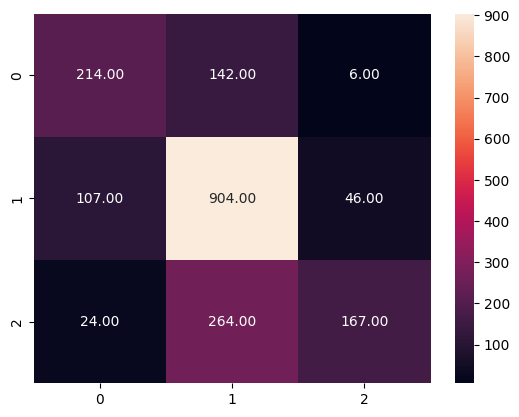

In [58]:
import seaborn as sn
sn.heatmap(cm1, annot=True, fmt = '.2f')

<Axes: >

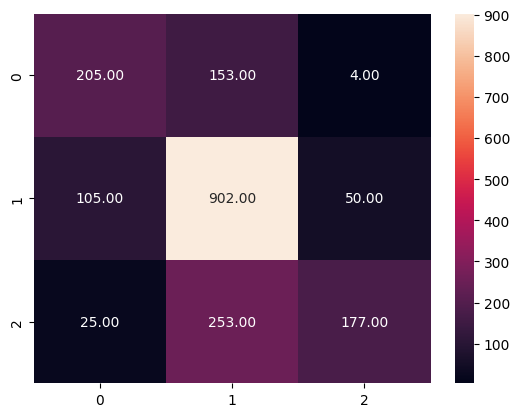

In [59]:
sn.heatmap(cm2, annot=True, fmt = '.2f')

<Axes: >

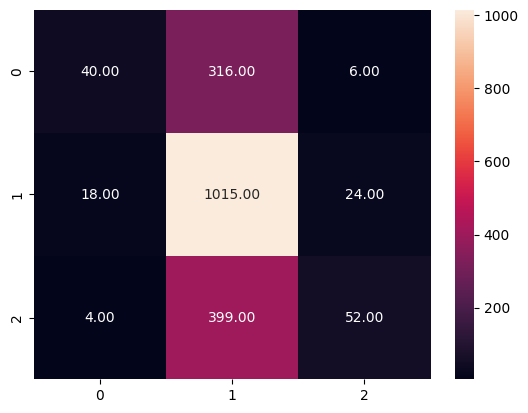

In [60]:
sn.heatmap(cm3, annot=True, fmt = '.2f')

In [55]:
accuracy_scores

[0.6856990394877268, 0.6851654215581644, 0.5907150480256137]

In [100]:
import praw
reddit = praw.Reddit(
    client_id="_4w3-13ViMbAUIrtcfe8kg",
    client_secret="U9GF-bnbPYwHqLjRwqjxAenQg1ACjQ",
    user_agent="my user agent",
)
print(reddit.read_only)

True


In [102]:
headings=[]
for submission in reddit.subreddit("wallstreetbets").hot(limit=25):
    #print(submission.title)
    headings.append(submission.title)

In [104]:
for i in range(25):
    input=remove_html_tags(headings[i])
    input=remove_accented_chars(input)
    input=expand_contractions(input)
    input=remove_special_characters(input)
    input=get_lem(input)
    input=remove_extra_whitespace_tabs(input)
    input=to_lowercase(input)
    headings[i]=input

In [108]:
pos_count=0
pos_avg=0
neg_count=0
neg_avg=0
neut_count=0
neut_avg=0
predicted_labels=[]
classifier = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
for i in range(25):
    res=classifier(headings[i])[0]
    label=label_to_pred(res["label"])
    predicted_labels.append(label)
    if (label=="Positive"):
        pos_count=pos_count+1
        pos_avg=pos_avg+res["score"]
    if(label=="Negative"):
        neg_count=neg_count+1
        neg_avg=neg_avg+res["score"]
    if(label=="Neutral"):
        neut_count=neut_count+1
        neut_avg=neut_avg+res["score"]
if (pos_count>neg_count and pos_count>neut_count):
    print("Positive")
    print(pos_avg/pos_count)
if (neg_count>pos_count and neg_count>neg_count):
    print("Negative")
    print(neg_avg/neg_count)
if (neut_count>pos_count and neut_count>neg_count):
    print("Neutral")
    print(neut_avg/neut_count)

Neutral
0.7559383260576349
